In [ ]:
# 获取每个数据集的image cache feature- 求平均值

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import json

# 读取NPZ文件
path = "/home/jingchen/promtsrc/lpclip/clip_feat/"
path = "/home/jingchen/promtsrc/lpclip/clip_feat/"
# datasets=['UCF101', 'Caltech101', 'SUN397', 'StanfordCars', 
# 'Food101', 'OxfordFlowers', 'FGVCAircraft', 'EuroSAT', 'DescribableTextures', 'OxfordPets', 'ImageNet']

dataset = 'ImageNet'
split = '/train.npz'
file_path = path + dataset + split
data = np.load(file_path)
print(len(data['feature_list']))
print((data['label_list']))
# 获取特征和标签
array_data = data["feature_list"]
array_label = data["label_list"]
print(array_label)
# 获取不同类别的标签
classnames_file = 'txt/' + dataset + '.json'
with open(classnames_file, 'r') as f:
    unique_labels = json.load(f)
print('unique_labels:', len(unique_labels))

# 初始化一个字典来存储每个类别的特征均值
class_means = {}

# 遍历每个类别
for label in unique_labels:
    # 筛选出当前类别的特征
    label_indices = np.where(array_label == label)[0]
    # print('label_indices:', label_indices)
    label_features = array_data[label_indices]
    
    # 计算当前类别的特征均值
    class_mean = np.mean(label_features, axis=0)
    # print('class_mean:', class_mean.shape)
    
    # 将类别标签及对应的特征均值存储到字典中
    class_means[label] = class_mean

# 将字典转换为数组，其中每一行代表一个类别的特征均值
print('before:', len(class_means))
cluster_centers_concatenated = np.array(list(class_means.values()))
print(cluster_centers_concatenated.shape)

# 保存聚类中心向量
np.save(path + dataset + split + '_avg_means.npy', cluster_centers_concatenated)



In [ ]:
# 获取每个数据集的 Image cache feature, 求Kmeans 均值

import numpy as np
from sklearn.cluster import KMeans

path = "/home/jingchen/promtsrc/lpclip/clip_feat/"
# datasets=['UCF101', 'Caltech101', 'SUN397', 'StanfordCars', 
# 'Food101', 'OxfordFlowers', 'FGVCAircraft', 'EuroSAT', 'DescribableTextures', 'OxfordPets']
datasets = ['ImageNet']

for dataset in datasets:
    split = '/train.npz'
    file_path = path + dataset + split
    data = np.load(file_path)

    # 获取特征和标签
    array_data = data["feature_list"]
    array_label = data["label_list"]

    # 获取不同类别的标签
    # 获取不同类别的标签
    classnames_file = 'txt/' + dataset + '.json'
    with open(classnames_file, 'r') as f:
        unique_labels = json.load(f)
    print('unique_labels:', len(unique_labels))
    print(unique_labels)
    # 初始化一个字典来存储每个类别的特征均值
    class_means = {}

    # 遍历每个类别
    for label in unique_labels:
        # 筛选出当前类别的特征
        label_indices = np.where(array_label == label)[0]
        label_features = array_data[label_indices]
        # print(label_indices)
        
        # 使用 K-means 聚类算法获取当前类别的聚类中心
        # kmeans = KMeans(n_clusters=1, random_state=0).fit(label_features)
        kmeans = KMeans(n_clusters=1, random_state=0, n_init=10).fit(label_features)
        class_mean = kmeans.cluster_centers_[0]
        # print('class_mean:', class_mean.shape)
        
        # 将类别标签及对应的特征均值存储到字典中
        class_means[label] = class_mean

    # 将字典转换为数组，其中每一行代表一个类别的特征均值
    print('before:', len(class_means))
    cluster_centers_concatenated = np.stack(list(class_means.values()), axis=0)
    print(cluster_centers_concatenated.shape)

    # 保存聚类中心向量
    np.save(path + dataset + split + '_k_means.npy', cluster_centers_concatenated)


(37, 512)


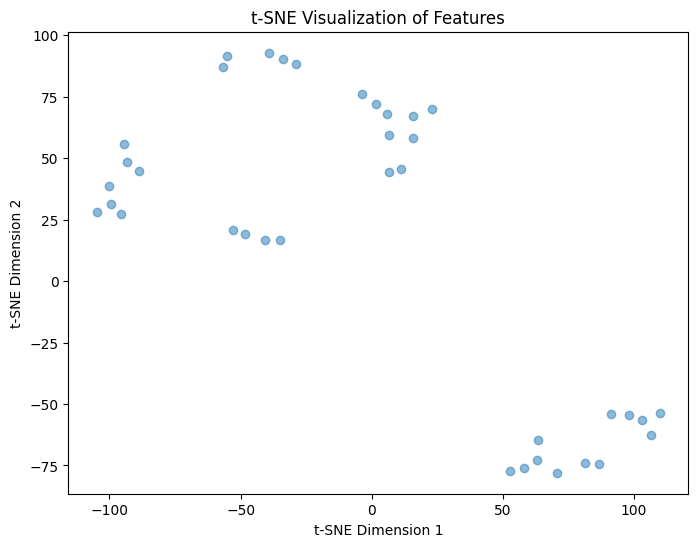

In [2]:
#可视化 训练的 Image cache feature
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


path = "/home/jingchen/promtsrc/lpclip/clip_feat/"
dataset = 'OxfordPets/'
split = 'train.npz'

array_data = np.load(path + dataset + split + 'cluster_centers.npy')
print(array_data.shape)


tsne = TSNE(n_components=2, perplexity=3, random_state=42)
embedded_features = tsne.fit_transform(array_data)

# 绘制 t-SNE 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

(4200, 512)
(4200, 512)


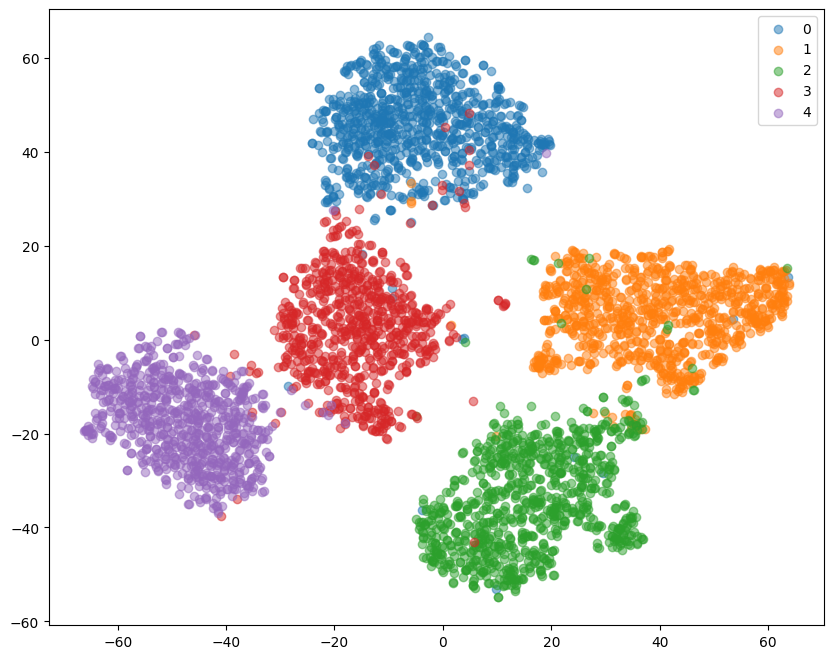

In [3]:
# 对比我们的方法和 Baseline方法的t-sne的差异


import numpy as np

# 读取NPZ文件
path = "/home/jingchen/promtsrc/lpclip/clip_feat_test/"
path2 = "/home/jingchen/promtsrc/lpclip/prompt_feat_test/"
datasets = ['UCF101', 'Caltech101', 'SUN397', 'StanfordCars', 
            'Food101', 'OxfordFlowers', 'FGVCAircraft', 'EuroSAT', 'DescribableTextures', 'OxfordPets']

dataset = 'EuroSAT/'
split = 'test.npz'
file_path = path2 +'prompt_base_euro/'+ split
our_path = path2 +'our_base_euro/'+ split
data = np.load(file_path)

# 获取特征和标签
array_data = data["feature_list"]
print(array_data.shape)
array_label = data["label_list"]

# 获取不同类别的标签
unique_labels = np.unique(array_label)

# 初始化一个字典来存储每个类别的特征数组
class_features = {}

# 遍历每个类别
for label in unique_labels:
    # 筛选出当前类别的特征
    label_indices = np.where(array_label == label)[0]
    label_features = array_data[label_indices]
    
    # 存储当前类别的特征数组
    class_features[label] = label_features

# 将每个类别的特征数组按顺序堆叠起来
stacked_features = np.concatenate([class_features[label] for label in unique_labels], axis=0)
# print(stacked_features.shape)
# 保存堆叠后的特征数组
np.save(file_path  + '_stacked_features.npy', stacked_features)

# 获取前10个类别
first_10_labels = np.unique(array_label)[:10]

# 获取前10个类别对应的特征
selected_features = np.concatenate([class_features[label] for label in first_10_labels], axis=0)
print(selected_features.shape)

# 创建TSNE对象
tsne = TSNE(n_components=2, random_state=42)

# 对特征进行降维
embedded_features = tsne.fit_transform(selected_features)

# 绘制t-SNE可视化结果
plt.figure(figsize=(10, 8))
for i, label in enumerate(first_10_labels):
    label_indices = np.where(array_label == label)[0]
    label_embedded_features = embedded_features[label_indices]
    # print(label_embedded_features.shape)
    plt.scatter(label_embedded_features[:, 0], label_embedded_features[:, 1], label=label, alpha=0.5)

# plt.title('Our Method on Base Class of DTD, Accuracy: 84.40')
plt.legend()
plt.show()

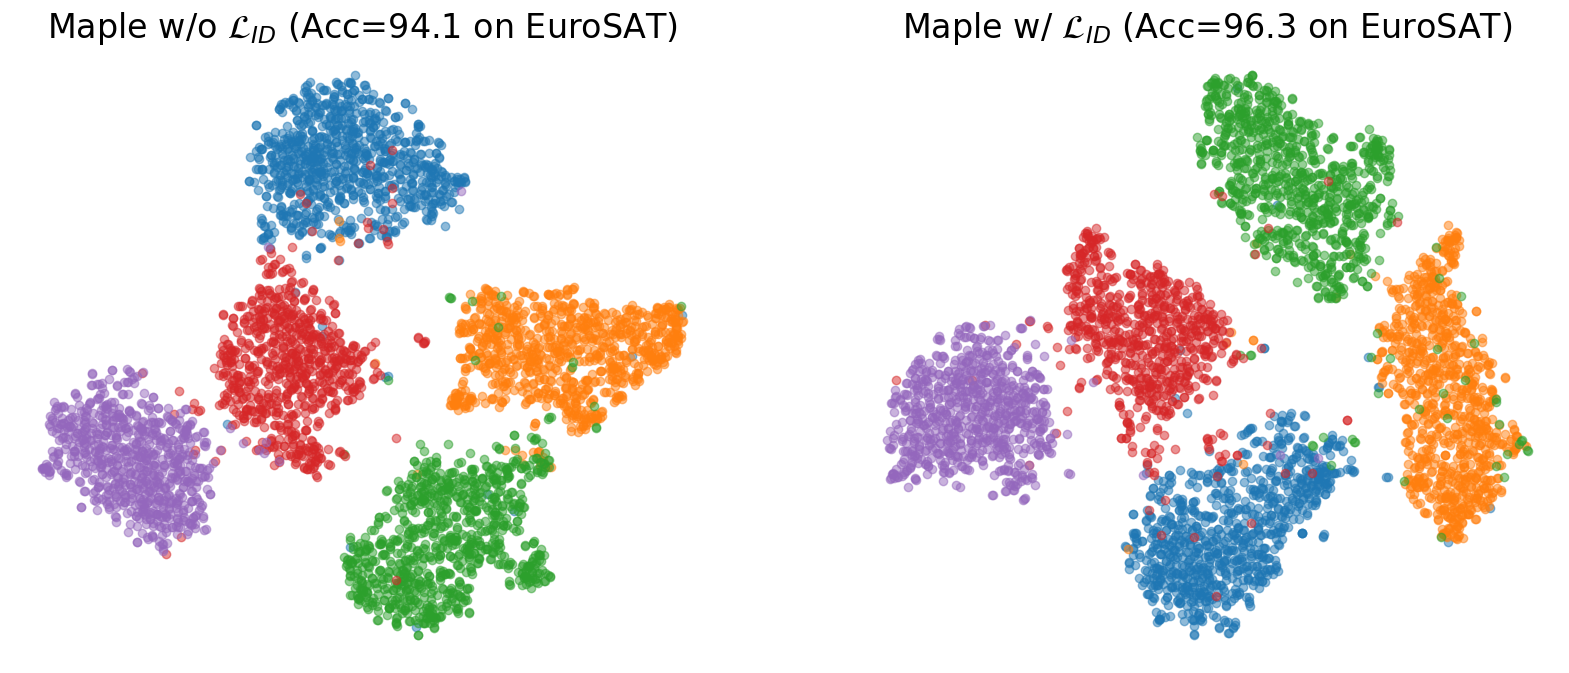

<Figure size 640x480 with 0 Axes>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def load_data(file_path):
    """加载数据并返回特征和标签"""
    data = np.load(file_path)
    return data["feature_list"], data["label_list"]

def extract_class_features(array_data, array_label, unique_labels):
    """提取每个类别的特征"""
    class_features = {}
    for label in unique_labels:
        label_indices = np.where(array_label == label)[0]
        class_features[label] = array_data[label_indices]
    return class_features

def concatenate_selected_features(class_features, selected_labels):
    """合并选定类别的特征"""
    return np.concatenate([class_features[label] for label in selected_labels], axis=0)

def plot_tsne(embedded_features, array_label, selected_labels, title, subplot_position):
    """绘制 t-SNE 可视化结果"""
    plt.subplot(subplot_position)
    for label in selected_labels:
        label_indices = np.where(array_label == label)[0]
        label_embedded_features = embedded_features[label_indices]
        plt.scatter(label_embedded_features[:, 0], label_embedded_features[:, 1], label=label, alpha=0.5)
    plt.title(title, fontsize=24)
    # plt.xlabel('t-SNE Dimension 1', fontsize=16)
    # plt.ylabel('t-SNE Dimension 2', fontsize=16)
    # plt.legend()
      # 去掉图像的边框
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


# 设置路径
path2 = "/home/jingchen/promtsrc/lpclip/prompt_feat_test/"
dataset = 'EuroSAT/'
split = 'test.npz'
file_path = path2 + 'prompt_base_euro/' + split
our_path = path2 + 'our_base_euro/' + split

# 加载数据
array_data_baseline, array_label_baseline = load_data(file_path)
array_data_ours, array_label_ours = load_data(our_path)

# 获取不同类别的标签
unique_labels = np.unique(array_label_baseline)

# 提取每个类别的特征
class_features_baseline = extract_class_features(array_data_baseline, array_label_baseline, unique_labels)
class_features_ours = extract_class_features(array_data_ours, array_label_ours, unique_labels)

# 获取前10个类别
first_10_labels = unique_labels[:10]

# 获取前10个类别对应的特征
selected_features_baseline = concatenate_selected_features(class_features_baseline, first_10_labels)
selected_features_ours = concatenate_selected_features(class_features_ours, first_10_labels)

# 创建TSNE对象并降维
tsne = TSNE(n_components=2, random_state=42)
embedded_features_baseline = tsne.fit_transform(selected_features_baseline)
embedded_features_ours = tsne.fit_transform(selected_features_ours)

# 使用相同的TSNE模型降维以保持一致的空间
tsne_shared = TSNE(n_components=2, random_state=42)
embedded_features_baseline = tsne_shared.fit_transform(selected_features_baseline)
embedded_features_ours = tsne_shared.fit_transform(selected_features_ours)

# 绘制t-SNE可视化结果
plt.figure(figsize=(20, 8))

# 基准方法的t-SNE图
plot_tsne(embedded_features_baseline, array_label_baseline, first_10_labels, 'Maple w/o $\mathcal{L}_{ID}$ (Acc=94.1 on EuroSAT)', 121)

# 我们的方法的t-SNE图
plot_tsne(embedded_features_ours, array_label_ours, first_10_labels, 'Maple w/ $\mathcal{L}_{ID}$ (Acc=96.3 on EuroSAT)', 122)

plt.show()

plt.savefig("tsne_comparison.pdf", format='pdf', dpi=300)

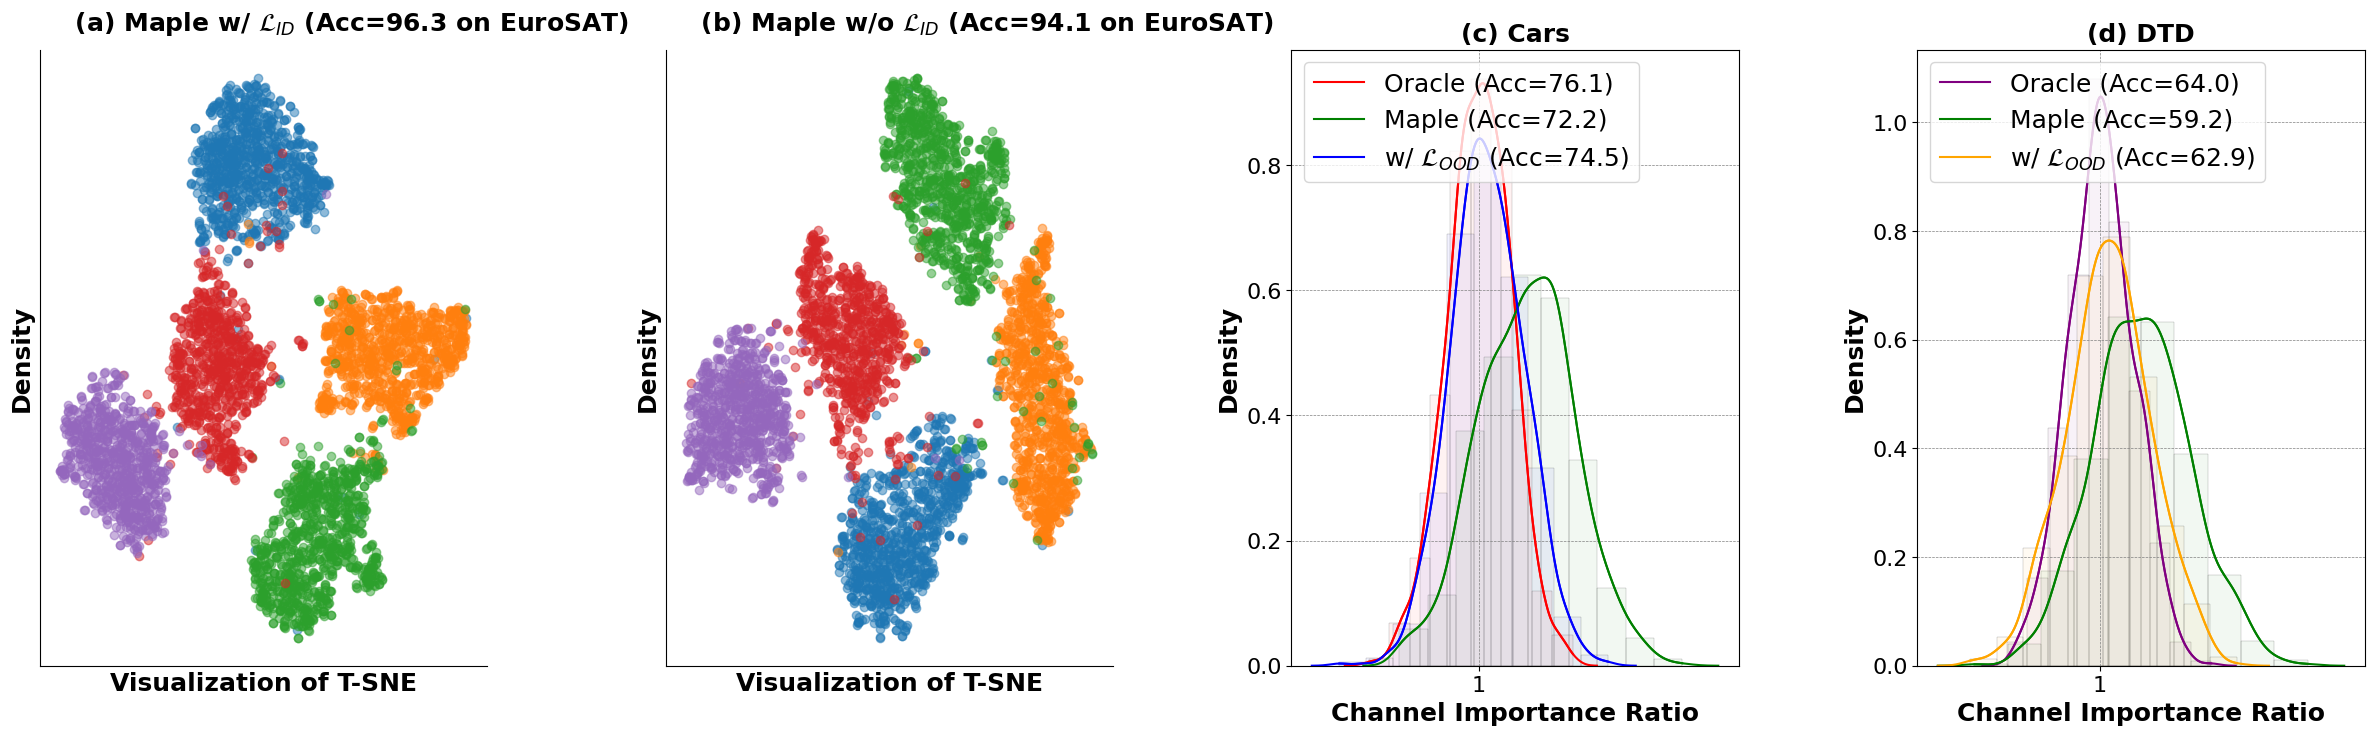

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def load_data(file_path):
    """加载数据并返回特征和标签"""
    data = np.load(file_path)
    return data["feature_list"], data["label_list"]

def extract_class_features(array_data, array_label, unique_labels):
    """提取每个类别的特征"""
    class_features = {}
    for label in unique_labels:
        label_indices = np.where(array_label == label)[0]
        class_features[label] = array_data[label_indices]
    return class_features

def concatenate_selected_features(class_features, selected_labels):
    """合并选定类别的特征"""
    return np.concatenate([class_features[label] for label in selected_labels], axis=0)

def plot_tsne(embedded_features, array_label, selected_labels, title, subplot_position, label):
    """绘制 t-SNE 可视化结果"""
    plt.subplot(subplot_position)
    for lbl in selected_labels:
        label_indices = np.where(array_label == lbl)[0]
        label_embedded_features = embedded_features[label_indices]
        plt.scatter(label_embedded_features[:, 0], label_embedded_features[:, 1], label=lbl, alpha=0.5)
    plt.title(f"    {title}", fontsize=label_fontsize, fontweight='bold', loc='left', pad=14)
    # plt.text(-0.1, 1.1, label, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top')
    plt.xlabel('Visualization of T-SNE', fontsize=label_fontsize, fontweight='bold')
    plt.ylabel('Density', fontsize=label_fontsize, fontweight='bold')
    # 添加左边和底部的轴线
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# 设置路径
path2 = "/home/jingchen/promtsrc/lpclip/prompt_feat_test/"
dataset = 'EuroSAT/'
split = 'test.npz'
file_path = path2 + 'prompt_base_euro/' + split
our_path = path2 + 'our_base_euro/' + split

# 加载数据
array_data_baseline, array_label_baseline = load_data(file_path)
array_data_ours, array_label_ours = load_data(our_path)

# 获取不同类别的标签
unique_labels = np.unique(array_label_baseline)

# 提取每个类别的特征
class_features_baseline = extract_class_features(array_data_baseline, array_label_baseline, unique_labels)
class_features_ours = extract_class_features(array_data_ours, array_label_ours, unique_labels)

# 获取前10个类别
first_10_labels = unique_labels[:10]

# 获取前10个类别对应的特征
selected_features_baseline = concatenate_selected_features(class_features_baseline, first_10_labels)
selected_features_ours = concatenate_selected_features(class_features_ours, first_10_labels)

# 创建TSNE对象并降维
tsne = TSNE(n_components=2, random_state=42)
embedded_features_baseline = tsne.fit_transform(selected_features_baseline)
embedded_features_ours = tsne.fit_transform(selected_features_ours)

# 使用相同的TSNE模型降维以保持一致的空间
tsne_shared = TSNE(n_components=2, random_state=42)
embedded_features_baseline = tsne_shared.fit_transform(selected_features_baseline)
embedded_features_ours = tsne_shared.fit_transform(selected_features_ours)

# 生成模拟数据用于直方图
hist_oracle = np.random.normal(loc=1.0, scale=0.4, size=1000)
hist_coop = np.random.normal(loc=1.6, scale=0.6, size=1000)
hist_ours = np.random.normal(loc=1.1, scale=0.5, size=1000)

# 生成新的直方图数据用于“DTD”方法
hist_dtd = np.random.normal(loc=1, scale=0.4, size=1000)
hist_dtd_extra = np.random.normal(loc=1.5, scale=0.6, size=1000)
hist_dtd_ours = np.random.normal(loc=1.1, scale=0.5, size=1000)

# 设置字体属性
label_fontsize = 18  # 坐标轴标签字体大小
tick_fontsize = 16   # 刻度标签字体大小
legend_fontsize = 18  # 图例字体大小

# 创建图表
fig, axes = plt.subplots(1, 4, figsize=(30, 8), gridspec_kw={'width_ratios': [1.5, 1.5, 1.5, 1.5]})
plt.subplots_adjust(wspace=0.4)

# 绘制t-SNE可视化结果
plot_tsne(embedded_features_baseline, array_label_baseline, first_10_labels, '(a) Maple w/ $\mathcal{L}_{ID}$ (Acc=96.3 on EuroSAT)', 141, '(a)')
plot_tsne(embedded_features_ours, array_label_ours, first_10_labels, '(b) Maple w/o $\mathcal{L}_{ID}$ (Acc=94.1 on EuroSAT)', 142, '(b)')

# 设置统一的栅格线样式
grid_params = {
    'which': 'both',  # 显示主刻度和次刻度的栅格线
    'color': 'gray',  # 栅格线颜色
    'linestyle': '--',  # 栅格线样式
    'linewidth': 0.5  # 栅格线宽度
}

# 绘制直方图并弱化显示 (c) EuroSAT
sns.histplot(hist_oracle, kde=True, ax=axes[2], color='red', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.histplot(hist_coop, kde=True, ax=axes[2], color='green', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.histplot(hist_ours, kde=True, ax=axes[2], color='blue', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.kdeplot(hist_oracle, ax=axes[2], color='red', label='Oracle (Acc=76.1)')
sns.kdeplot(hist_coop, ax=axes[2], color='green', label='Maple (Acc=72.2)')
sns.kdeplot(hist_ours, ax=axes[2], color='blue', label='w/ $\mathcal{L}_{OOD}$ (Acc=74.5)')
axes[2].set_title('(c) Cars', fontsize=label_fontsize, fontweight='bold')
axes[2].set_xlabel('Channel Importance Ratio', fontsize=label_fontsize, fontweight='bold')
axes[2].set_ylabel('Density', fontsize=label_fontsize, fontweight='bold')
axes[2].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[2].legend(fontsize=legend_fontsize, loc='upper left')
axes[2].grid(True, **grid_params)
axes[2].set_xticks([1])

# 绘制新的直方图和核密度估计用于“DTD”方法 (d) DTD
sns.histplot(hist_dtd, kde=True, ax=axes[3], color='purple', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.histplot(hist_dtd_extra, kde=True, ax=axes[3], color='green', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.histplot(hist_dtd_ours, kde=True, ax=axes[3], color='orange', bins=10, stat="density", alpha=0.05, linewidth=0.1)
sns.kdeplot(hist_dtd, ax=axes[3], color='purple', label='Oracle (Acc=64.0)')
sns.kdeplot(hist_dtd_extra, ax=axes[3], color='green', label='Maple (Acc=59.2)')
sns.kdeplot(hist_dtd_ours, ax=axes[3], color='orange', label='w/ $\mathcal{L}_{OOD}$ (Acc=62.9)')
axes[3].set_title('(d) DTD', fontsize=label_fontsize, fontweight='bold')
axes[3].set_xlabel('Channel Importance Ratio', fontsize=label_fontsize, fontweight='bold')
axes[3].set_ylabel('Density', fontsize=label_fontsize, fontweight='bold')
axes[3].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[3].legend(fontsize=legend_fontsize, loc='upper left')
axes[3].grid(True, **grid_params)
axes[3].set_xticks([1])

# 保存图片为PDF文件
plt.savefig("tsne_comparison_with_histograms.pdf", format='pdf', dpi=300)

plt.show()

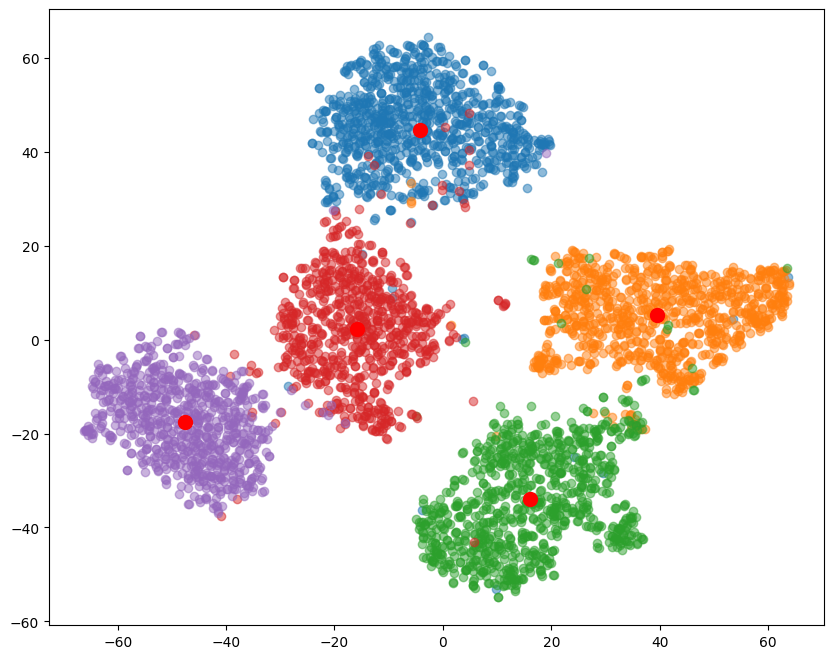

In [28]:
#计算t-sne的中心


import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 读取堆叠后的特征
stacked_features = np.load(file_path  + '_stacked_features.npy')

# 获取前10个类别
first_10_labels = np.unique(array_label)[:10]

# 获取前10个类别对应的特征
selected_features = np.concatenate([class_features[label] for label in first_10_labels], axis=0)

# 创建TSNE对象
tsne = TSNE(n_components=2, random_state=42)

# 对特征进行降维
embedded_features = tsne.fit_transform(selected_features)

# 绘制t-SNE可视化结果
plt.figure(figsize=(10, 8))
for i, label in enumerate(first_10_labels):
    label_indices = np.where(array_label == label)[0]
    label_embedded_features = embedded_features[label_indices]
    plt.scatter(label_embedded_features[:, 0], label_embedded_features[:, 1], label=label, alpha=0.5)

    # 计算聚类中心
    cluster_center = np.mean(label_embedded_features, axis=0)
    plt.scatter(cluster_center[0], cluster_center[1], color='red', marker='o', edgecolor='red', s=100)

# plt.title('t-SNE Visualization with Cluster Centers')
# plt.legend()
plt.show()
